In [190]:
import pandas as pd
import re
import numpy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from wordcloud import WordCloud
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords

In [191]:
#Read csv file
df = pd.read_csv("fake_job_postings.csv")
df.head()#display 5 rows

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [192]:
# Number of rows and columns of data
df.shape

(17880, 18)

In [193]:
#columns
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [194]:
#information of columns of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [195]:
df = df[["title","location","company_profile","requirements","benefits","telecommuting","has_company_logo","has_questions","employment_type","required_experience","required_education","industry","function","fraudulent","description"]]

In [196]:
df.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [197]:
#Missing values in dataframe
df.isna().sum()

title                     0
location                346
company_profile        3308
requirements           2695
benefits               7210
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
description               1
dtype: int64

In [198]:
#total number of duplicate rows
df.duplicated().sum()

290

In [199]:
#delete duplicate rows
df.drop_duplicates(inplace=True)

In [200]:
df.duplicated().sum()

0

In [201]:
#fill missing values with blank space
df.fillna(' ',inplace=True)

C:\Users\MYPC\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


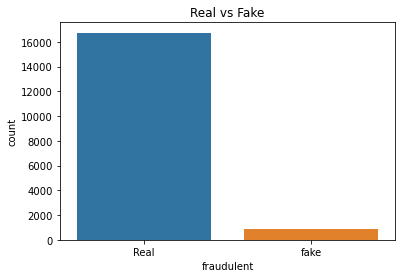

In [202]:
#histogram showing the number of fake and real job postings
ax = plt.subplot()
sns.countplot(df.fraudulent)
ax.set_xticklabels(["Real","fake"])
plt.title("Real vs Fake")
plt.show()

In [203]:
#Removing missing values
df.dropna(axis=0,how='any',inplace=True)

In [204]:
df.isna().sum()

title                  0
location               0
company_profile        0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
description            0
dtype: int64

In [205]:
#data with full-time employment type and are real
df_real_full = df[(df['employment_type']=='Full-time') & (df['fraudulent']==0)]
df_real_full.shape

(10927, 15)

In [206]:
df_real_full.title.value_counts()  #Customer service Associate has more job postings

Customer Service Associate             140
Software Engineer                       71
Account Manager                         63
Web Developer                           49
Account Executive                       39
                                      ... 
Front End Interface Developer            1
Marketing Communications Specialist      1
 Agile Business Analyst                  1
Software Engineer - Computer Vision      1
Electrical Project Engineer              1
Name: title, Length: 7079, dtype: int64

In [207]:
# industries having fake job postings
df_ind = df[df["fraudulent"]==1]
df_ind.industry.value_counts(ascending=True)

Warehousing                    1
Building Materials             1
Military                       1
Public Safety                  1
Cosmetics                      1
                            ... 
Marketing and Advertising     45
Hospital & Health Care        49
Accounting                    57
Oil & Energy                 108
                             270
Name: industry, Length: 63, dtype: int64

In [208]:
df.columns

Index(['title', 'location', 'company_profile', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'description'],
      dtype='object')

In [209]:
#combining text in single column
df["text"] = df["title"]+df["location"]+df["description"]+df["company_profile"]+df["requirements"]+df["benefits"]
cols_to_delete = ["title","location","description","company_profile","requirements","benefits"]
for col in cols_to_delete:
    del df[col]

In [210]:
df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
0,0,1,0,Other,Internship,,,Marketing,0,"Marketing InternUS, NY, New YorkFood52, a fast..."
1,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,"Customer Service - Cloud Video ProductionNZ, ,..."
2,0,1,0,,,,,,0,"Commissioning Machinery Assistant (CMA)US, IA,..."
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,"Account Executive - Washington DCUS, DC, Washi..."
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,"Bill Review ManagerUS, FL, Fort WorthJOB TITLE..."


In [211]:
from sklearn.preprocessing import LabelEncoder
label_columns = ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function']
lb_make = LabelEncoder()
for i in label_columns:
  df[i] = lb_make.fit_transform(df[i])

In [212]:
df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
0,0,1,0,3,5,0,0,23,0,"Marketing InternUS, NY, New YorkFood52, a fast..."
1,0,1,0,2,7,0,76,8,0,"Customer Service - Cloud Video ProductionNZ, ,..."
2,0,1,0,0,0,0,0,0,0,"Commissioning Machinery Assistant (CMA)US, IA,..."
3,0,1,0,2,6,2,23,32,0,"Account Executive - Washington DCUS, DC, Washi..."
4,0,1,1,2,6,2,52,17,0,"Bill Review ManagerUS, FL, Fort WorthJOB TITLE..."


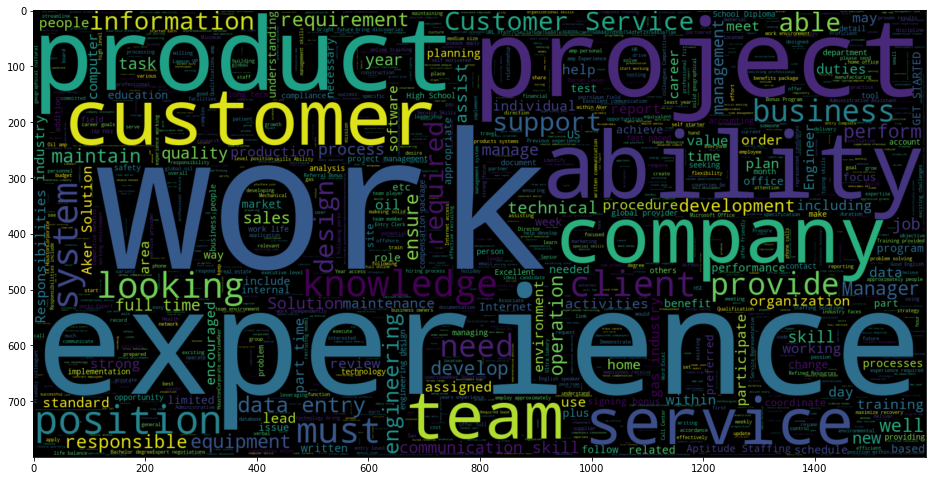

In [213]:
#Separate fraud and actual jobs
fraudjobs_text = df[df.fraudulent==1].text
actualjobs_text = df[df.fraudulent==0].text

#Fraudulent jobs word cloud
STOPWORDS = stopwords.words()
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [214]:
print(fraudjobs_text.head())

98     IC&E TechnicianUS, , Stocton, CAIC&amp;E Techn...
144    Forward Cap. The group has raised a fund for t...
173    Technician Instrument & Controls USTechnician ...
180    Sales ExecutivePK, SD, KarachiSales Executive ...
215    IC&E Technician Mt PosoUS, CA, Bakersfield, CA...
Name: text, dtype: object


In [215]:
print(actualjobs_text.head())

0    Marketing InternUS, NY, New YorkFood52, a fast...
1    Customer Service - Cloud Video ProductionNZ, ,...
2    Commissioning Machinery Assistant (CMA)US, IA,...
3    Account Executive - Washington DCUS, DC, Washi...
4    Bill Review ManagerUS, FL, Fort WorthJOB TITLE...
Name: text, dtype: object


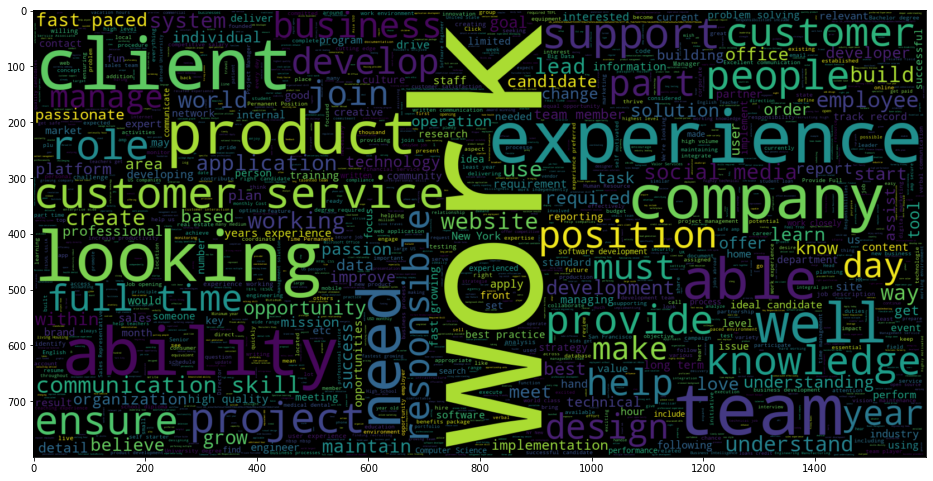

In [216]:
#Actual jobs wordcloud
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(actualjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [234]:
#Cleaning and preprocessing
# Create our list of punctuation marks
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import wordnet
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
punctuations = string.punctuation

# Create our list of stopwords
stop_words = set(stopwords.words('english'))

def custom_tokenizer(sentence):
    mytokens = word_tokenize(sentence)
    lemmatizer = WordNetLemmatizer()
    mytokens = [ word.strip().lower() for word in mytokens if word not in stop_words and word not in punctuations ]
    def get_part_of_speech(word):
        probable_part_of_speech = wordnet.synsets(word)
        pos_counts = Counter()
        pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
        pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
        pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
        pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
  
        most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
        return most_likely_part_of_speech
        
        
    # return a preprocessed list of tokens
    mytoken = [lemmatizer.lemmatize(token,get_part_of_speech(token)) for token in mytokens]
    return mytokens

# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(df.text, df.fraudulent, test_size=0.3)

#Train-test shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12313,)
(12313,)
(5277,)
(5277,)


In [218]:
from sklearn.linear_model import LogisticRegression

In [235]:
#Random Forest Classifier
# Create pipeline using Bag of Words
pipe = Pipeline([('vectorizer', CountVectorizer(tokenizer=custom_tokenizer)),
                 ('classifier', RandomForestClassifier(n_estimators=500,n_jobs = 3,oob_score=True,criterion="entropy"))])

#Training the model.
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(tokenizer=<function custom_tokenizer at 0x000002439431B700>)),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', n_estimators=500,
                                        n_jobs=3, oob_score=True))])

In [236]:
# Predicting with a test dataset
y_pred = pipe.predict(X_test)

# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred))

Classification Accuracy: 0.9736592761038468
Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5008
           1       0.99      0.49      0.65       269

    accuracy                           0.97      5277
   macro avg       0.98      0.74      0.82      5277
weighted avg       0.97      0.97      0.97      5277

Confusion Matrix

[[5007    1]
 [ 138  131]]


In [246]:
pipe = Pipeline([('vectorizer', CountVectorizer(tokenizer=custom_tokenizer)),
                 ('classifier', LogisticRegression(max_iter=5000))])

#Training the model.
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(tokenizer=<function custom_tokenizer at 0x000002439431B700>)),
                ('classifier', LogisticRegression(max_iter=5000))])

In [247]:
y_pred = pipe.predict(X_test)

# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred))

Classification Accuracy: 0.979723327648285
Classification Report

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5008
           1       0.90      0.68      0.77       269

    accuracy                           0.98      5277
   macro avg       0.94      0.84      0.88      5277
weighted avg       0.98      0.98      0.98      5277

Confusion Matrix

[[4988   20]
 [  87  182]]
